# 타이타닉에서 죽거나 살아남은 살아남았는지 추측하는 모델

### 중요한 라이브러리들을 가져옵니다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

### Kaggle에서 필요한 'train.csv' 파일과 'test.csv' 파일을 갖고 새로운 판다스 데이터프레임들을 만듭니다.

In [2]:
train = pd.read_csv('train.csv', index_col=['PassengerId'])
X_test = pd.read_csv('test.csv', index_col=['PassengerId'])

In [3]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### 'Age'라는 나이를 나타나는 열의 NAN 값을 평균 값으로 바꿉니다.

In [4]:
for dataset in [train, X_test]:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

### 'Age' 열의 값들을 나이에 따라 카테고리들에 구별합니다.

In [5]:
for dataset in [train, X_test]:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S


### Age vs. Survived | 시각화

<Axes: xlabel='Age', ylabel='Survived'>

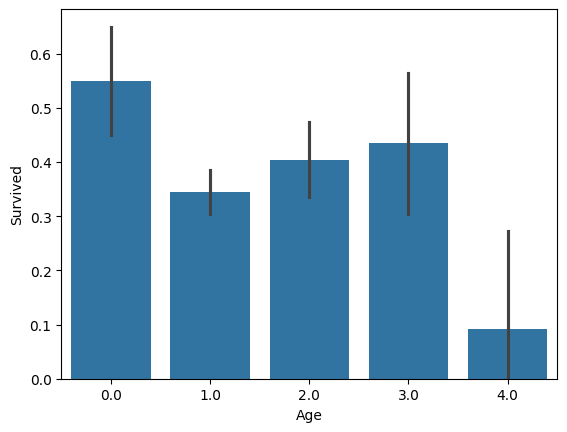

In [7]:
sns.barplot(data=train, x='Age', y='Survived')

### Sex vs. Survived | 시각화

<Axes: xlabel='Sex', ylabel='Survived'>

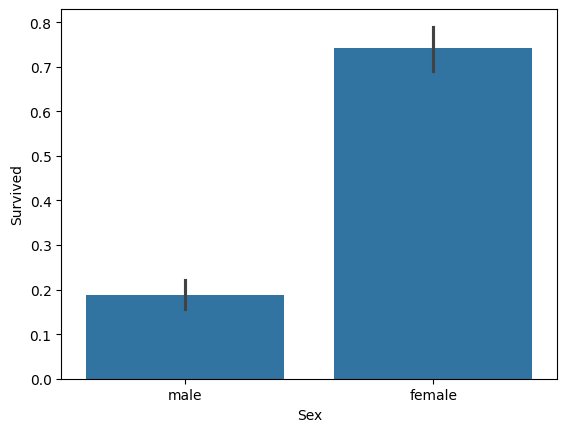

In [8]:
sns.barplot(data=train, x='Sex', y='Survived')

### 'SibSP', 'Parch'라는 가족의 크기를 나타나는 열들을 하나로 합칩니다.

In [9]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1

### FamilySize vs. Survived

<Axes: xlabel='FamilySize', ylabel='Survived'>

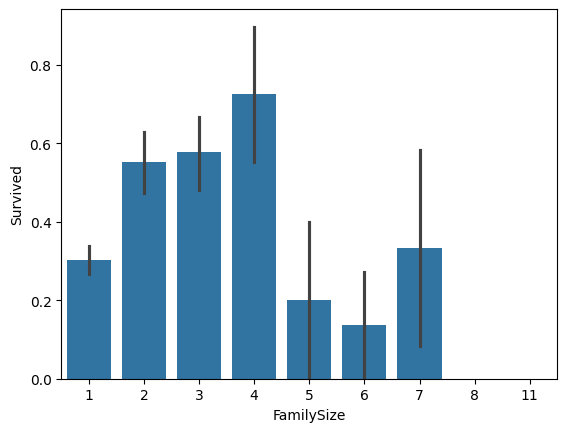

In [10]:
sns.barplot(data=train, x='FamilySize', y='Survived')

### FamilySize vs. Survived

<Axes: xlabel='FamilySize', ylabel='Survived'>

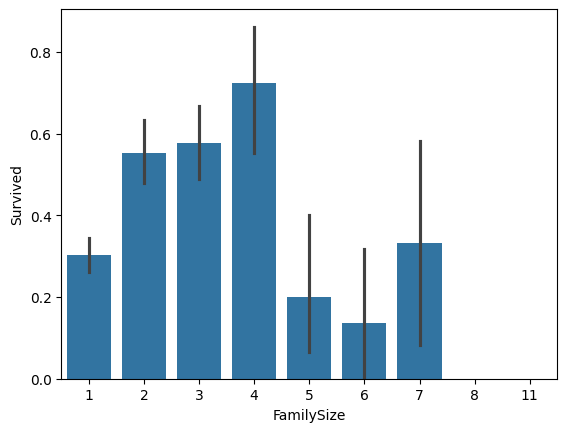

In [11]:
sns.barplot(data=train, x='FamilySize', y='Survived')

In [12]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,1


### 'FamilySize' 열을 통해 가족과 같이 있었던 승객들과 혼자 있었던 승객들을 나타나는 열을 만듭니다.

<Axes: xlabel='Age', ylabel='Survived'>

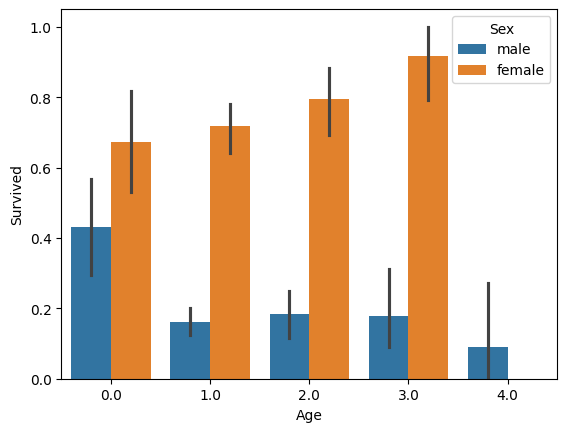

In [13]:
sns.barplot(data=train, x='Age', y='Survived', hue='Sex')

### IsAlone 라는 열을 만들고 그 열에 승객이 혼자 있는지, 가족이라

In [14]:
for dataset in [train, X_test]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

### IsAlone vs. Survived

<Axes: xlabel='IsAlone', ylabel='Survived'>

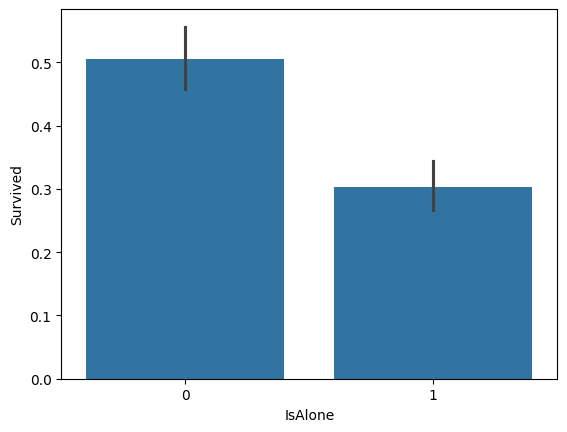

In [15]:
sns.barplot(data=train, x='IsAlone', y='Survived')

### Embarked vs. Survived

<Axes: xlabel='Embarked', ylabel='Survived'>

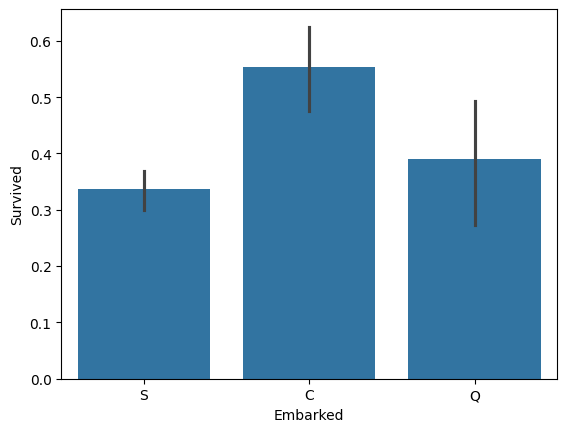

In [16]:
sns.barplot(data=train, x='Embarked', y='Survived')

### Pclass vs. Survived

<Axes: xlabel='Pclass', ylabel='Survived'>

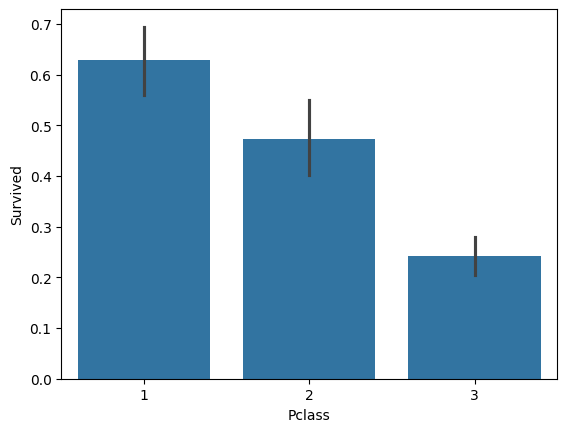

In [17]:
sns.barplot(data=train, x='Pclass', y='Survived')

### 소용없는 열들을 빼버립니다.

In [18]:
train.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
X_test.drop(['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

### 'X_test' 데이터프레임의 'Fare' 열에 있는 NAN 값들을 미디언 (median) 값으로 바꿉니다.

In [19]:
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

### NAN 값을 삭제시킵니다

In [20]:
train.dropna(inplace=True)
X_test.dropna(inplace=True)

### Mapping을 통해 String 값들을 숫차 값으로 바꿉니다.

In [21]:
mapping = {'male': 0, 'female': 1}

train['Sex'] = train['Sex'].map(mapping)
X_test['Sex'] = X_test['Sex'].map(mapping)

In [22]:
mapping = {'S': 0, 'C': 1, 'Q': 2}

train['Embarked'] = train['Embarked'].map(mapping)
X_test['Embarked'] = X_test['Embarked'].map(mapping)

In [23]:
train['Embarked'].unique()

array([0, 1, 2])

### Correlation 함수로 열들의 서로 있는 관계가 얼마나 있는지 보여주는 시각화를 만듭니다. 

<Axes: >

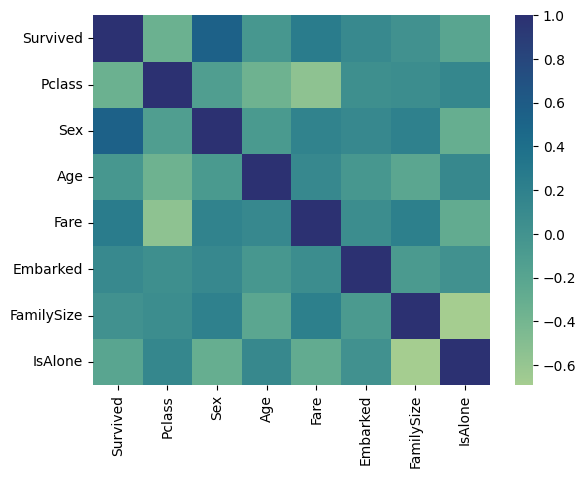

In [24]:
correlation = train.corr()
sns.heatmap(correlation, cmap='crest')

In [25]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
PassengerId,,,,,,,,
1,0,3,0,1.0,7.2500,0,2,0
2,1,1,1,2.0,71.2833,1,2,0
3,1,3,1,1.0,7.9250,0,1,1
4,1,1,1,2.0,53.1000,0,2,0
5,0,3,0,2.0,8.0500,0,1,1


### Train set를 X와 Y로 나눕니다.

In [26]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']

### MLPClassifier (Multi-Layer Perceptron Classifier) 모델을 가져와서 학습시킵니다.

In [27]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, Y_train)

/Users/furqatniyazov/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

### 학습받은 모델을 통해서 Test set의 승객들의 중에서 누가 살아남았는지 예측합니다.

In [28]:
predicted = clf.predict(X_test)
len(predicted)

418

### 결과를 저장합니다.

In [29]:
result = pd.DataFrame(data = {'Survived': predicted}, index=X_test.index)
pd.DataFrame.to_csv(result, 'predict.csv')